<a href="https://colab.research.google.com/github/raulFuzita/cct_data_visualisation_communication/blob/CA1/DVC_CA_Marina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization and Communication CA

*Lecturer:* Marina

*Students*

.   Fatime Reisenleitner - id: 2020491 

.   Raul Macedo Fuzita - id: 2018337



##**1. Business Understanding:**

###**Objectives:**

Our team has decided to work in liason with the **healthcare** sector gathering their **global dataset** from **2020**, to investigate and provide information and possible advice regarding the Covid situation. This is a very relevant topic as the pandemic is still very much present in and effecting our daily lives. 



###**Problem Domain**:
----------------------------------------------------------------------
> *Healthcare sector wishes to implement the best approach to dealing with the Covid situation and for this reason requested the analysis on Global cases.*
----------------------------------------------------------------------

###**Problem Motives:**
We wish to investigate:
* Which **Location** has proven to have a better handling of the situation (with **less deaths and cases**)
* Are there any **peaks during-after major Global festivities**? (Christmas, Black Friday, Valentine's day... Shopping/gathering)
* Has the situation **improved globally**? 


##**2. Data Understanding:**

###**Data Collection:**

We acquired the **covid.csv** dataset from github (https://github.com/raulFuzita/cct_data_visualisation_communication/tree/CA1) which was kindly made available by the global healthcare sector. It contains....


#### Dataset Information

[Covid CSV File](https://corgis-edu.github.io/corgis/csv/covid/)

From the CORGIS Dataset Project

By Dennis Kafura, Melanie Sutphin, Joung Min Choi and Bo Guan
Version 2.0.0, created 10/22/2021
Tags: Covid, Covid-19, pandemic, infection, world health

##### Overview

The data set contains daily reports of Covid-19 cases and deaths in countries worldwide. The data also shows the country’s population and the number of cases per 100,000 people on a rolling 14 day average.

Samples were taken from `31/12/2019` to `14/12/2020`


####**Data Source:**
For our investigation we are using a **CSV** file format, which is available at: https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data

###**Data Description:**

To understand the data better we conducted several initial analysis on the data set. This is presented step-by-step below.

The least packages and data for the analysis

In [12]:
#@title Required Packages installation
#@markdown You must run this cell to install all the necessary packages and dependencies for this analysis.

#@markdown We highly recommend you run all cells from top to bottom.

import pandas as pd               # Pandas allows multi-dimensional arrays. It's usefull for machine learning, data analysis, and data science
import numpy as np                # Numpy provides function to work with arrays, domain of linear algebra, fourier transformation, and matrices (w3school, NumPy Introduction)
import matplotlib as mpl
import matplotlib.pyplot as plt   # Matplotlib is a low level graph plotting library in python that serves as a visualization utility (w3school, Matplotlib Tutorial). 
import seaborn as sns             # Seaborn allows you to plot 
import ipywidgets as widgets
import statistics as sts
import datetime as dt
import calendar

!pip install git+https://github.com/raulFuzita/cct_data_visualisation_communication.git@CA1#egg=data_analytics_tools&subdirectory=data_analytics_tools/src

from data_analytics_tools.data_analytics_tools import pivot_melt as pv, dictionary as dc, mmnorm as m, invskew as sk, zscore as zs


In [15]:
#@markdown Importing the data set in a CSV format, and storing it in a object. DF stands for Data Frame.

#@markdown Please, run this cell.

df = pd.read_csv("https://corgis-edu.github.io/corgis/datasets/csv/covid/covid.csv")

In [16]:
#@markdown Run this cell to assign columns' names to a dictionary. The dictionary will be used to select the columns throughout the code. This will prevent when any change to the columns' names affect the rest of the code.

dct = dc.Dictionary()
dct.add_keys(df.columns.to_list()+['Date'])
newkeys = ['Day', 'Month', 'Year', 'Cases', 'Deaths', 'Country', 'Code', 'Population', 'Continent', 'Rate']
dct.update_keys(newkeys)

In [ ]:
# Sample to rename dictionary assossiation
dct.update_values({
    'Day': 'newname', 
    'Month': 'newname', 
    'Year': 'newname', 
    'Cases': 'newname', 
    'Deaths': 'newname', 
    'Country': 'newname', 
    'Code': 'newname', 
    'Population': 'newname', 
    'Continent': 'newname', 
    'Rate': 'newname',
    'Date': 'newname'
})

####**Data Size:**
We have decided to verify the data size to make sure we meet the requirements of our investigations, as well as to verify that our dataset is large enough to draw accurate conclusions.

In [17]:
#@markdown The **Asessment Details** requires a minimum of 10 columns and a minimum of 1500 observations. The data set in question for this analysis, has 53629 observations and 10 columns.

#@markdown Please, run this cell to display the data frame shape.

df.shape


(53629, 10)

As we have demonstrated the dataset is large enough for a reliable  investigations.

###**EDA:**

In [18]:
#@markdown The `head` function shows the first five observations in a data set. It gives us an overview of the names of the variables and a rough idea of the data in it.

#@markdown Run the cell to display an overview of the data set.
df.head()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,14,12,2020,746,6,Afghanistan,AFG,38041757,Asia,9.013779
1,13,12,2020,298,9,Afghanistan,AFG,38041757,Asia,7.052776
2,12,12,2020,113,11,Afghanistan,AFG,38041757,Asia,6.868768
3,11,12,2020,63,10,Afghanistan,AFG,38041757,Asia,7.134266
4,10,12,2020,202,16,Afghanistan,AFG,38041757,Asia,6.968658


In [19]:
#@markdown The `info` function provides the type of each variable in the data set.

#@markdown Run this cell to see the information.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53629 entries, 0 to 53628
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date.Day            53629 non-null  int64  
 1   Date.Month          53629 non-null  int64  
 2   Date.Year           53629 non-null  int64  
 3   Data.Cases          53629 non-null  int64  
 4   Data.Deaths         53629 non-null  int64  
 5   Location.Country    53629 non-null  object 
 6   Location.Code       53545 non-null  object 
 7   Data.Population     53629 non-null  int64  
 8   Location.Continent  53629 non-null  object 
 9   Data.Rate           53629 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ MB


In [20]:
#@markdown The `describe` function plays an important role to start the first steps in the data preparation. Since it provides information such as min/max, standard deviation, quartiles, and mean of each variable, it makes it easier to spot outliers and perhaps unnecessary data.

#@markdown Run this cell to see the description.

df.describe()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Data.Population,Data.Rate
count,53629.000000,53629.000000,53629.000000,53629.000000,53629.000000,5.362900e+04,53629.000000
mean,15.845009,6.406776,2019.998751,898.374033,22.873035,4.164579e+07,44.382863
std,8.940220,2.600373,0.035324,5019.868017,124.259355,1.548019e+08,113.147610
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,-1.000000e+00,-147.419587
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.324820e+06,0.269203
50%,16.000000,7.000000,2020.000000,13.000000,0.000000,7.813207e+06,4.652782
75%,24.000000,9.000000,2020.000000,206.000000,3.000000,2.860872e+07,34.905448
max,31.000000,12.000000,2020.000000,102507.000000,4928.000000,1.433784e+09,1900.836210


###**Data Quality Analysis:**

In [21]:
#@markdown Using a pandas function `isna` combined with `sum` we can check how many NA data exist if exist any in the data set.

#@markdown Run this cell to see below there are 84 NA values in the `Location.Code` variable.

pd.isna(df).sum()

Date.Day               0
Date.Month             0
Date.Year              0
Data.Cases             0
Data.Deaths            0
Location.Country       0
Location.Code         84
Data.Population        0
Location.Continent     0
Data.Rate              0
dtype: int64

In [23]:
#@markdown Pandas by default display up to 10 rows. It is half the top 5 rows and the other half the last 5 rows. This cell contains a setting to display the max of rows in a data frame.

pd.options.display.max_rows = None

#@markdown Once the limit of displayed rows is reset, we can visually analyse the NA observation and decide whether this is a dirty chunk of data or wrong entries.

#@markdown Unfortunately, in this case, we have more issues than a single column with NA values. The column `Data.Population` does not have the population amount, `Data.Cases` has a negative value.

#@markdown Please, run this cell. After running this cell you can skip this visualization due to the size.

df[pd.isna(df[dct.Code])]

# Load the whole data frame will take very long if this value is not reset to the original.
pd.options.display.max_rows = 15

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
9531,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9532,2,3,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9533,1,3,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9534,29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9535,28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9536,27,2,2020,14,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9537,26,2,2020,0,1,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9538,25,2,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9539,24,2,2020,57,1,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
9540,23,2,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0


In [25]:
#@markdown To keep looking for dirty data and outliers we can break it down by removing temporarily some observation. Since we identified the NA values we will remove than so we can move on in our analysis.

#@markdown Please, run this cell if you want to continue looking for outliers and dirtiness.

df_numeric = df
df_numeric.dropna(axis=0)

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,14,12,2020,746,6,Afghanistan,AFG,38041757,Asia,9.013779
1,13,12,2020,298,9,Afghanistan,AFG,38041757,Asia,7.052776
2,12,12,2020,113,11,Afghanistan,AFG,38041757,Asia,6.868768
3,11,12,2020,63,10,Afghanistan,AFG,38041757,Asia,7.134266
4,10,12,2020,202,16,Afghanistan,AFG,38041757,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...
53624,25,3,2020,0,0,Zimbabwe,ZWE,14645473,Africa,0.000000
53625,24,3,2020,0,1,Zimbabwe,ZWE,14645473,Africa,0.000000
53626,23,3,2020,0,0,Zimbabwe,ZWE,14645473,Africa,0.000000
53627,22,3,2020,1,0,Zimbabwe,ZWE,14645473,Africa,0.000000


In [26]:
#@markdown A quick analysis in this data set is noticeable that it should not have negative values in any of those 10 variables. For instance, the variable `Dta.Cases` will have either 0 or over than zero cases in a day.

#@markdown The first step here is to insolate the numerical variables. Please, run this cell to see the output.

df_numeric = df.iloc[:, [*range(0,5),7,9]]
df_numeric.head()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Data.Population,Data.Rate
0,14,12,2020,746,6,38041757,9.013779
1,13,12,2020,298,9,38041757,7.052776
2,12,12,2020,113,11,38041757,6.868768
3,11,12,2020,63,10,38041757,7.134266
4,10,12,2020,202,16,38041757,6.968658


In [148]:
#@markdown The next code should answer a simple question of whether there are negative values or not, so we can move one in the analysis.

#@markdown The result shows if there is/are negative value(s). Please, run the cell to display the result.

print('Are there any negative values? ', (df_numeric.values < 0).any())

Are there any negative values?  True


In [149]:
#@markdown If we have negative values we can quickly display them and get the number of negative observations. Negative values in this scenario could indicate the presence of outliers.

#@markdown Run this cell to display negative values. If you do not want to analyse it, you can skip this step.

check_ng = df_numeric[df_numeric.values < 0]
check_ng

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Data.Population,Data.Rate
5518,2,6,2020,11,0,11801151,-0.813480
5519,1,6,2020,0,0,11801151,-0.906691
5520,31,5,2020,8,0,11801151,-0.906691
5521,30,5,2020,14,0,11801151,-0.974481
5522,29,5,2020,0,0,11801151,-1.093114
...,...,...,...,...,...,...,...
52758,21,10,2020,0,0,-1,0.000000
52759,20,10,2020,0,0,-1,0.000000
52760,19,10,2020,0,0,-1,0.000000
52761,18,10,2020,0,0,-1,0.000000


In [151]:
#@markdown By calling shape property we can display the dimension of our data frame. Run the cell to see the result below.

print('The data frame dimension is [row, column]:', check_ng.shape)

The data frame dimension is [row, column]: (150, 7)


In [30]:
#@markdown Last, but not least we have data that might not contribute to our analysis. The `describe` function gave us important information to take into consideration. The world was more aware of COVID-19 in **2020** which brings the question of whether we have enough measurements in **2019** to really impact our analysis. The short answer is not. As we can see if we filter register cases and deaths in 2019 will find only one observation in China in comparison to the whole country.

#@markdown Run the cell to show the output.

cases2019 = df[df[dct.Year] == 2019]
cases_deaths_2019 = cases2019[(cases2019[dct.Cases] > 0) | (cases2019[dct.Deaths] > 0)]
cases_deaths_2019

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
10848,31,12,2019,27,0,China,CHN,1433783692,Asia,0.0


In [31]:
#@markdown After another analysis, we discovered that **Afghanistan** is the only country with observation until December. Since we will compare samples against other countries, we no longer need the samples from December.

#@markdown Please, run the cell if you want to display the results.

df[df[dct.Month] == 12]

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,14,12,2020,746,6,Afghanistan,AFG,38041757,Asia,9.013779
1,13,12,2020,298,9,Afghanistan,AFG,38041757,Asia,7.052776
2,12,12,2020,113,11,Afghanistan,AFG,38041757,Asia,6.868768
3,11,12,2020,63,10,Afghanistan,AFG,38041757,Asia,7.134266
4,10,12,2020,202,16,Afghanistan,AFG,38041757,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...
48467,31,12,2019,0,0,Thailand,THA,69625581,Asia,0.000000
50647,31,12,2019,0,0,United_Arab_Emirates,ARE,9770526,Asia,0.000000
50958,31,12,2019,0,0,United_Kingdom,GBR,66647112,Europe,0.000000
51503,31,12,2019,0,0,United_States_of_America,USA,329064917,America,0.000000


##**3. Data Preparation:**

###**Data Wrangling:**
Treat Outlier & Missing Values

In [35]:
#@title #### Steps to clean up the data set:


#@markdown 1.   An easy way to remove negative values is to traverse the data frame, check the type of the variable and if the conditions match it is turned into an NA value. Then we can remove all these observations with other NA values.

# The for loop statement will traverse the data frame by name. Then to access the variables, the name in each loop is passed as an index to
# the array and has its type-checked in the if statement.
# If the conditional statement is satisfied the current variable is checked for negative values. If there is any all the
# negative values should become an NA value.
for i in df.columns:
  if (df[i].dtypes == 'int64') | (df[i].dtypes == 'float64'):
    df[df[i] < 0] = np.NaN


#@markdown 2.   We can apply a similar technique to select all measurements from 2019, and then remove them. Similarly to the 12th month.

# Numpy package provides a property to change a value to NA value.
df[df[dct.Year] < 2020] = np.NaN

# Remove the 12th month of data
df[df[dct.Month] == 12] = np.NaN


#@markdown 3.   In the end, we can sum all the NA observations and display them. All the original NA values, negative values and unnecessary observations from 2019 is a total of 212 observations.

#@markdown By running this cell the three steps above should be executed.

pd.isna(df).sum()

Date.Day              226
Date.Month            226
Date.Year             226
Data.Cases            226
Data.Deaths           226
Location.Country      226
Location.Code         226
Data.Population       226
Location.Continent    226
Data.Rate             226
dtype: int64

In [37]:
#@markdown 4.   Now all the NA observations can be removed safely.
df.dropna(axis=0, inplace=True)

#@markdown 5.   Let's visualize a summary of the data set again and see if we can pick any other outliers. We can start asking if the maximum of deaths is compatible with a trustworthy source.

#@markdown By running this cell the three steps above should be executed.

df.describe()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Data.Population,Data.Rate
count,53403.000000,53403.000000,53403.0,53403.000000,53403.000000,5.340300e+04,53403.000000
mean,15.827856,6.402075,2020.0,902.300170,22.926746,4.168775e+07,44.582414
std,8.926744,2.589605,0.0,5029.944863,123.121507,1.548747e+08,113.310025
min,1.000000,1.000000,2020.0,0.000000,0.000000,8.150000e+02,0.000000
25%,8.000000,4.000000,2020.0,0.000000,0.000000,1.324820e+06,0.288458
50%,16.000000,7.000000,2020.0,13.000000,0.000000,7.813207e+06,4.711048
75%,24.000000,9.000000,2020.0,208.000000,3.000000,2.860872e+07,35.166036
max,31.000000,11.000000,2020.0,102507.000000,4928.000000,1.433784e+09,1900.836210


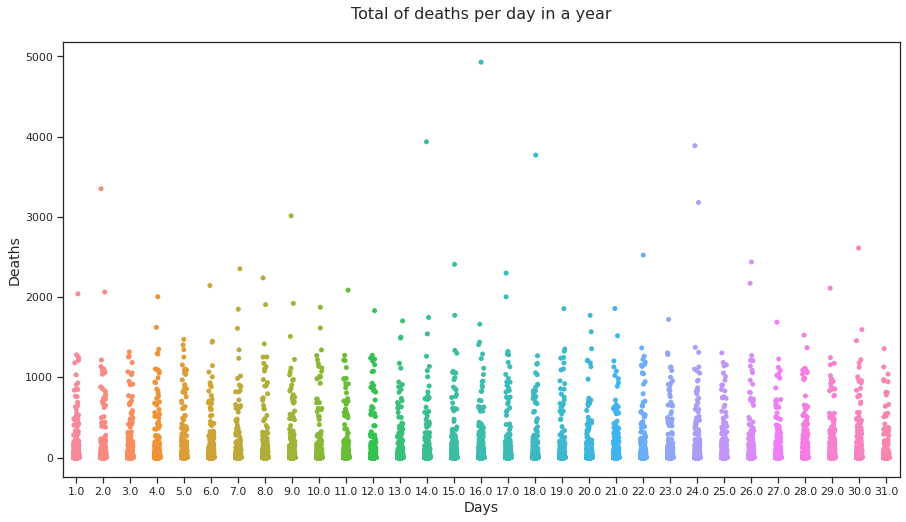

In [144]:
#@markdown The website [Worldometer](https://www.worldometers.info/coronavirus/) provides information about cases and deaths related to Covid-19.
#@markdown According to the worldometer the highest number of daily deaths are 15558 in 2020. Therefore our data set doesn't seem to have outliers related to deaths.
#@markdown We can display the number of deaths on each day of the year in 2020. Later we will be able to break it down and answer where the highest rate is and analyse it deeply.

#@markdown Please, run this cell to plot the stip chart.

plt.figure(figsize=(15,8))
sns.stripplot(x=dct.Day, y=dct.Deaths, data=df, jitter=True)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Deaths', fontsize=14)
plt.title('Total of deaths per day in a year\n', fontsize=16)
plt.show()

###**Feature Engineering:**
PCA, Dimension Reduction/Selection

##**4. Data Modelling:**

## **5. Evaluation:**

##**6. Deployment:**

## **Challenges:**

The Covid situation is a very sensitive topic and every nation has dealt with it in a different manner, hence we can only advice based on their records. 

* Humans are very much irrational with **Cognitive bias**. And this has been the foundation of their reactions to Covid. Hence it is impossible to dictate what people can or will do.
* There is a constant **clash of interest** with how to handle the pandemic.
 - Financial specialist: **economy** suffers with lockdowns
 -  Health professionals consider the worth of **human life** which requires the stop of spreading
* Our **data** also is **limited** in the sense that we lack information about:
 - Covid variations 
 - number of vaccinated and it's effectiveness in the population 
 - any quarantine, lock-downs 

* Due to the very **limited time** constraint and extremely **small group** (of 2) we had to:
 - **disregard** certain situations
    * The number of cases can differ based on population size

 - make **assumptions**
    * geographic Regions (Island vs Continent) have the same conditions
    * Population is not influenced by travelling (i.e. any changes to population are due to birth or death rate) 

##Test

In [77]:
#@markdown Run this cell to load necesary functions for the next steps.

import numpy as np

def plot_bubble(data, xticks=None, areasize=50, alpha=0.5):
  legends = data.columns.unique()
  if (type(xticks) is list) | (type(xticks) is np.ndarray):
    plt.xticks(np.arange(len(xticks)), xticks)
  for col in data.columns:
    plt.scatter(data[col].index, data[col], s=data[col]/areasize, alpha=alpha)
  plt.legend(legends)

In [78]:
#@markdown Run this cell to generate a overview of the first five rows
df.head()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
14,30.0,11.0,2020.0,0.0,0.0,Afghanistan,AFG,38041757.0,Asia,6.416633
15,29.0,11.0,2020.0,228.0,11.0,Afghanistan,AFG,38041757.0,Asia,6.845110
16,28.0,11.0,2020.0,214.0,15.0,Afghanistan,AFG,38041757.0,Asia,6.784650
17,27.0,11.0,2020.0,0.0,0.0,Afghanistan,AFG,38041757.0,Asia,6.395604
18,26.0,11.0,2020.0,200.0,12.0,Afghanistan,AFG,38041757.0,Asia,7.341932


In [80]:
#@title ### Find 4 countries with the highest death rate.

#@markdown Run this cell to group data by country, sum columns Cases, Deaths, and get the max of Population column.

cases_deaths = df.groupby(by=[dct.Country], as_index=False).agg({
    dct.Cases:'sum',
    dct.Deaths:'sum',
    dct.Population:'max'
})
cases_deaths_date = df.groupby([dct.Month, dct.Day], as_index=False)[[dct.Cases, dct.Deaths]].apply(sum)

country4_hd = cases_deaths.sort_values(dct.Deaths)[-4:]
country4_hd.head()

,Location.Country,Data.Cases,Data.Deaths,Data.Population
126,Mexico,943630.0,93228.0,1.275755e+08
91,India,8364086.0,124315.0,1.366418e+09
27,Brazil,5590025.0,161106.0,2.110495e+08
202,United_States_of_America,9486486.0,233729.0,3.290649e+08


In [126]:
#@markdown Run this cell to sort data by month and filter by country.

df_sortedbydm = df.sort_values(by=[dct.Month, dct.Day])
filter = country4_hd[dct.Country].values
dfplot = pv.pivot_melt(df_sortedbydm, dct.Country, dct.Deaths, filter=filter)

#@markdown Select a country from the select area. This chart is interactive and should change the information once a country name is selected.

#@markdown The graphic below compares the total deaths by Covid-19 against a few countries death rates. The period measured took place between January and November in 2020.

default = dfplot.columns.unique()
options = default.append(pd.Index(['Default']))
four_country_picker = widgets.SelectMultiple(
    options=options,
    value=list(options),
    description='Countries: '
)

@widgets.interact(symbols=four_country_picker)
def render(symbols):
  if 'Default' in symbols:
    symbols = tuple(options)
  selected = dfplot[dfplot.columns[dfplot.columns.isin(symbols)]]
  plt.figure(figsize =(12, 9))
  plt.plot(cases_deaths_date[dct.Deaths])
  plt.plot(selected)
  plt.xlabel('Days in a Year', fontsize=14)
  plt.ylabel('Deaths\' rate', fontsize=14)
  plt.title('Total Deaths vs Country\'s Deaths\n', fontsize=16)
  plt.legend(['Total Deaths']+list(symbols))
  plt.show()

interactive(children=(SelectMultiple(description='Countries: ', index=(0, 1, 2, 3, 4), options=('Brazil', 'Ind…

<Figure size 720x504 with 0 Axes>

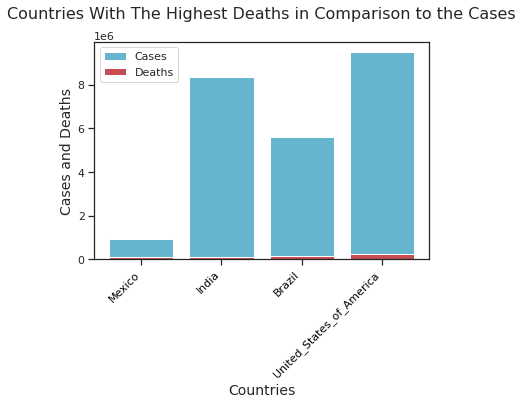

In [125]:
#@title ### Comparing deaths and cases

#@markdown Although those countries have the highest death rate, it is still much smaller than the cases. This analysis is not regardless of the number of deaths it represents in percentage but the correlation between those two variables.

#@markdown Yet wet cannot conclude the number of cases does not impact more significantly the number of deaths. We need further investigation which these small data sets cannot provide us with enough variables and observations for such a conclusion. We believe, it is still too early for anyone to have conclusive data for a final answer.

#@markdown Please, run the cell to display a bar cheart.

plt.figure(figsize =(10, 7))
country = country4_hd[dct.Country].values
pos = np.arange(len(country))

ax = plt.subplots()
plt.bar(pos, country4_hd[dct.Cases], color='c', label='Cases')
plt.bar(pos, country4_hd[dct.Deaths], color='r', label='Deaths')
plt.xticks(pos, country, color='black', rotation=45, horizontalalignment='right')

plt.xlabel('Countries', fontsize=14)
plt.ylabel('Cases and Deaths', fontsize=14)
plt.title('Countries With The Highest Deaths in Comparison to the Cases\n', fontsize=16)
plt.legend()
plt.show()

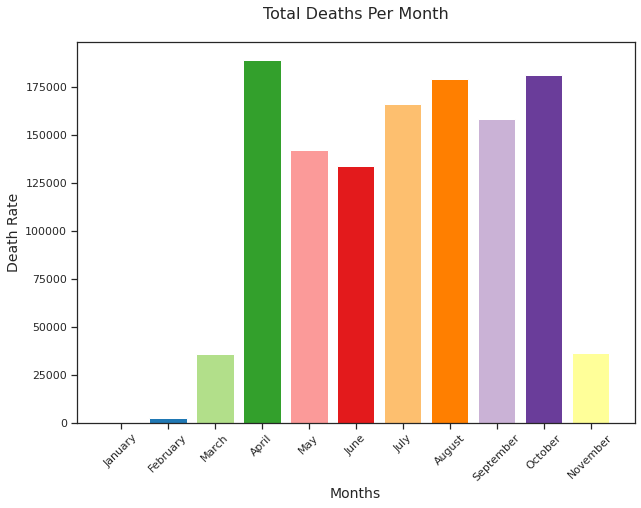

In [124]:
#@title ### Find out if those countries have the highest cases in each month, too.

#@markdown See below a graphic representing the total death rate for each month between January and November.

#@markdown Run this cell to display this graphic.

# Group data by Month, and sum Cases and Deaths
month_cd = df.groupby([dct.Month], as_index=False).agg({
    dct.Cases:'sum',
    dct.Deaths:'sum'
})

# Generate plot label and graphic

monthsname = []
for mn in month_cd[dct.Month]:
  monthsname.append(calendar.month_name[int(mn)])

plt.figure(figsize =(10, 7))
col_map = plt.get_cmap('Paired') # tab20c  Paired
plt.bar(month_cd[dct.Month], month_cd[dct.Deaths], tick_label=(month_cd.index+1), color=col_map.colors)
plt.xticks(np.arange(len(month_cd))+1, monthsname)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Death Rate', fontsize=14)
plt.title('Total Deaths Per Month\n', fontsize=16)
plt.xticks(rotation=45)
plt.show()

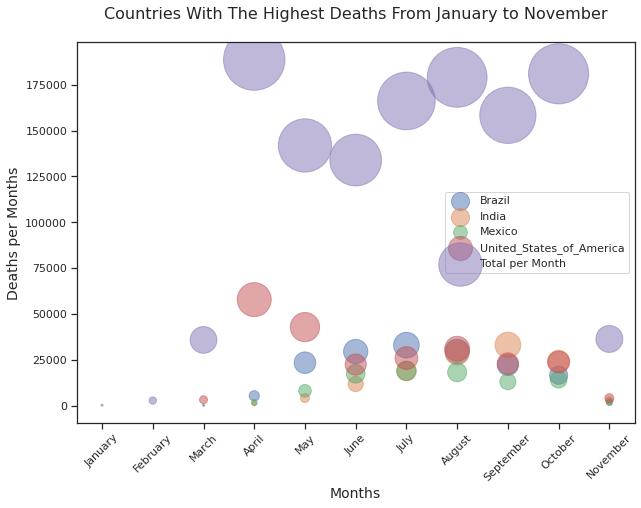

In [123]:
#@markdown In the next chart, we have a comparison of the four countries with the highest death rate and the total of deaths.
#@markdown If we analyse the graphic we can see that the US has a high rate between April and May. Brazil starts lower than the US; however, they cross paths in August. Mexico from June to October does not vary so much. Mexico shows improvements at the beginning of November.

# Group data by Month, and Country. Sum columns Cases and Deaths. Get max of Population column
country_month_cd = df.groupby([dct.Month, dct.Country], as_index=False).agg({
    dct.Cases:'sum',
    dct.Deaths:'sum',
    dct.Population:'max'
})

# Melt data and build a new data frame with countries and death rate
country4_hdc_month = pv.pivot_melt(country_month_cd, dct.Country, dct.Deaths, filter=filter)

# concat data frame 4 country highest death rate with month cases, and death rate.
merged_hdc_month = pd.concat([country4_hdc_month, month_cd[dct.Deaths]], axis=1)
merged_hdc_month.rename(columns={dct.Deaths:'Total per Month'}, inplace=True)

# Create plot label and plot the data frame.
monthsname = []
for mn in merged_hdc_month.index+1:
  monthsname.append(calendar.month_name[mn])

plt.figure(figsize =(10, 7))
plot_bubble(merged_hdc_month, monthsname)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Deaths per Months', fontsize=14)
plt.title('Countries With The Highest Deaths From January to November\n', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [104]:
#@title Highest death rate per continent

#@markdown Run this cell to group data by continent and sum all the death observations.

continent_tot_deaths = df.groupby([dct.Continent], axis=0, as_index=False)[[dct.Deaths]].apply(sum)
tot_deaths = continent_tot_deaths[dct.Deaths].sum()
continent_tot_deaths

,Location.Continent,Data.Deaths
0,Africa,43933.0
1,America,647984.0
2,Asia,247622.0
3,Europe,283754.0
4,Oceania,1064.0


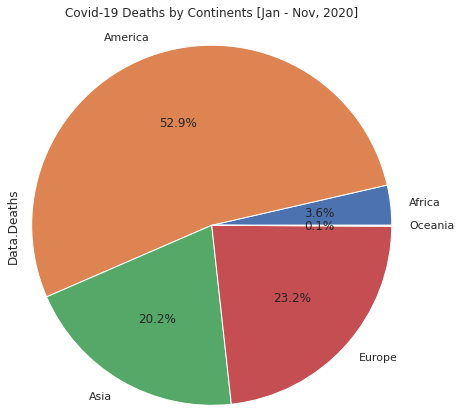

In [134]:
#@markdown Run this cell to plot a pie chart that describes the total death per continent between January and November 2020.

plt.figure(figsize =(9, 6))
labels = list(continent_tot_deaths[dct.Continent].values)
continent_tot_deaths[dct.Deaths].plot(labels=labels, kind='pie', radius=1.2, autopct='%1.1f%%')
plt.title('Covid-19 Deaths by Continents [Jan - Nov, 2020]\n', fontsize = 12)
plt.tight_layout()

In [76]:
#@title ### What continent are the four countries with the highest death rate?

# Get name of the 4 country with the highest death rate
country4_names = country4_hdc_month.columns

# Generate a data frame with contry and its continent
country_continent = pd.DataFrame()
for k, v in df[df[dct.Country].isin(country4_names)].groupby([dct.Country, dct.Continent]):
  temp = pd.DataFrame({
      'country':[k[0]],
      'continent':[k[1]],
  })
  country_continent = country_continent.append(temp, ignore_index=True)

# Display data frame
country_continent

,country,continent
0,Brazil,America
1,India,Asia
2,Mexico,America
3,United_States_of_America,America


In [75]:
#@title ### Is there any correlation between population, cases, and deaths?

#@markdown When analysed the four countries with the highest death rate and cases, it is hard to see much correlation between them. However, when death rate and cases are compared against each other we can see a strong correlation between those two variables.

#@markdown A second observation shows a weak correlation between the number of people and an increase in cases and deaths. It is common to expect the more people you have the more transmission happens. Although, the correlation is not as higher as 6.


pcd = cases_deaths.iloc[:, 1:]
pcd.corr()

,Data.Cases,Data.Deaths,Data.Population
Data.Cases,1.000000,0.939739,0.542446
Data.Deaths,0.939739,1.000000,0.425481
Data.Population,0.542446,0.425481,1.000000


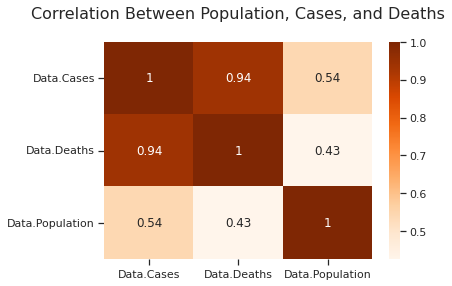

In [122]:
#@markdown Run this cell to plot a heatmap chart.

sns.heatmap(pcd.corr(), annot=True, cmap='Oranges')
plt.title('Correlation Between Population, Cases, and Deaths\n', fontsize=16)
plt.show()